*THIS VERSION INCLUDES*
***AUTOMATION***
## **Problem Statement**

- As most of us are doing our jobs or attending school/college virtually, we often have to attend online meetings and we can’t expect each of our places to always be quiet.

- Some of us may live in a noisy environment where we can hear horn sounds or other people’s voices or even sometimes our earphones are at fault which is certainly undesirable for the receiver at the other end.

- Being a **Machine learning Engineer**, How can you use neural networks to suppress the background noise, while enhancing the quality and intelligibility of speech.

<center>
<img src="https://drive.google.com/uc?id=1G_ZxHchgjq6Q1PWDIlfHlXqba8Q5JzoG" width=600></center>
<hr>

## Applications

Audio denoising aims at attenuating the noise while retaining the underlying signals. It has various applications like:

- Background noise reduction in audio/video calls
- Hearing Aids
- Automatic Speech Recognition

<center>
<img src="https://drive.google.com/uc?id=1ALn7A6P_H2wuV5SAkbB-JuC62HaNSxP1" width=300 height=200><img src="https://drive.google.com/uc?id=1k8oXZQFfnT-Kam73ZAvm_4Ichqbh0Ku4" width=300 height=200>
<img src="https://drive.google.com/uc?id=1mJUZmYmJOs0Y7bSOkEQ1CgiQADhW4zXr" width=300 height=200>
</center>





## What is a Audio Signal?
<center>
<img src="https://drive.google.com/uc?id=1oIMQcHPHX2dfkaPzekJGCIt2c6CkDuzE" width=500></center>

- Sound signals often repeat at regular intervals so that each wave has the same shape.
- The height shows the intensity of the sound and is known as the **amplitude**.
- The time taken for the signal to complete one full wave is the **period**.
- The number of waves made by the signal in one second is called the **frequency**.
- The frequency is the reciprocal of the period. The unit of frequency is Hertz.

- The majority of sounds we encounter may not follow such simple and regular periodic patterns.
- But signals of different frequencies can be added together to create composite signals with more complex repeating patterns.
- All sounds that we hear, including our own human voice, consist of waveforms like these. For instance, this could be the sound of a musical instrument.

<center><img src="https://drive.google.com/uc?id=1lmDK_t8pUJuVigOhavmJdz6Ja18Ul2Fl" width=400></center>

<hr>

## Types of Audio Signals
<center>
<img src="https://drive.google.com/uc?id=1kIeLWSByrX4LlvUGNV0YFmGgLcog1tGQ" width=500></center>

- **Analog**
 - Continuous values for time (x-axis)
 - Continuous values for amplitude (y-axis)
- **Digital**
 - Sequence of discrete values
 - Data points can only take on finite number of values










_________________________________________________________________________
### What is Audio Denoising?

> Audio Denoising is the process of removing noises from a speech without affecting the quality of the speech

- Here, the noises are any unwanted audio segments for the human hearing like vehicle horn sounds, wind noise, or even static noise.

<center>
<img src="https://drive.google.com/uc?id=1fpQUCtp6IrmB1preoUEly_Zx8vj6XDjO" width=600 height=200></center>

- Speech denoising is a long-standing problem.
- Given a noisy input signal, the aim is to filter out such noise without degrading the signal of interest.
- You can imagine someone talking in a video conference while a piece of music is playing in the background.
- In this situation, a speech denoising system has the job of removing the background noise in order to improve the speech signal.
- Besides many other use cases, this application is especially important for video and audio conferences, where noise can significantly decrease speech intelligibility.

- It is also known as speech enhancement as it enhances the quality of speech.
- **Speech enhancement** is an important task and it is used as a preprocessing step in various applications such as audio/video calls, hearing aids, Automatic Speech Recognition (ASR), and speaker recognition.

______________________________________________________________________________



**TASK:**
- Given a noisy input signal, we aim to build a statistical model that can extract the clean signal and return it to the user.
- Here, we focus on source separation of regular speech signals from different types of noise often found in the environment.

## Business Constraints

1. **Low Latency :** Since our project will run in real-time, we need the whole pipeline to be as much efficient and time-saving as possible.

2. **Quality** : As we are dealing with audio, any small error can be caught in the result. Hence, we need the accuracy of our model to be very high.

3. **Duration** : The user input audio file should be maximum of 10 minutes duration


## **Methodology :**

* ### Before Runtime

  * Download the dataset, Clean voice from LibriSpeech and Envionmental Noises from ESC-50 dataset.

  * Mix the noisy and clean audio to give our model as input, and we will give the noisy audio as output.

  * Convert all the preprocessed audio files in STFT Spectograms for both input and output.
  
  * Train our model.

* ### At runtime
  * Check if the audio file is less than 10 minutes

  * Takes an Noisy audio file as input.

 * Model Returns the noisy audio as output.

 * Remove noise from the input and return it to the user.








<center><img src="https://drive.google.com/uc?id=1v8CVyXsWIWd6m7Eh-NkmDThLN_lYnXHH"height=600 width=500></center>

## Importing Libraries

How can we read and process the audio data?

**librosa** is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems.[Click to Know More](https://librosa.org/doc/latest/index.html)

In [1]:
import os
import librosa
import numpy as np
import soundfile
import IPython
import shutil

## Dataset

For the process of Audio Denoising, we will use the datasets **LibriSpeech** and **ESC-50**

- The clean voices were mainly gathered from LibriSpeech: an ASR corpus based on public domain audiobooks.

- The environmental noises were gathered from ESC-50 dataset

> **LibriSpeech** is a corpus of approximately 1000 hours of 16kHz read English speech.
- The data is derived from read audiobooks from the LibriVox project, and has been carefully segmented and aligned.[Click to know more](http://www.openslr.org/12/)

- In this project, we will use the development set of clean speech dev-clean **dev-clean.tar.gz** for the training purpose.

> The **ESC-50** dataset is a labeled collection of 2000 environmental audio recordings. [Click to know more](https://github.com/karolpiczak/ESC-50)

- The dataset consists of 5-second-long recordings organized into 50 semantical classes (with 40 examples per class) loosely arranged into 5 major categories:

<center>
<img src="https://drive.google.com/uc?id=1fB9vnz8LwzezOfBoihKnePiYqfjeOnWP"></center>


- As you might be imagining at this point, we’re going to use the **ESC-50** dataset as noise signals to the speech examples.
- In other words, we first take a small speech signal — this can be someone speaking a random sentence from the **LibriSpeech** dataset.
- Then, we add noise to it — such as a woman speaking and a dog barking on the background.
- Finally, we use this artificially noisy signal as the input to our CNN model.
- The CNN model, in turn, receives this noisy signal and tries to output a clean representation of it.



We have 2703 clean speech audios and 2000 noisy audios
1. The total length of clean audio files is approximately 323 minutes.
2. The total length of noisy audio files is approximately 166 minutes.

Now we have downloaded the datasets.

Lets start preparing the dataset

_______________________________________________

## How can we train our CNN model with Audio data?

Can we convert the audio into a image?

The answer is, yes!!. This is done by generating spectograms from the audio.

Let's understand what a spectrum is, and use that to understand Spectograms

## What is a Spectrum?

- As we discussed earlier, signals of different frequencies can be added together to create composite signals, representing any sound that occurs in the real-world.
- This means that any signal consists of many distinct frequencies and can be expressed as the sum of those frequencies.

- The Spectrum is the set of frequencies that are combined together to produce a signal. eg. the picture shows the spectrum of a piece of music.

- The Spectrum plots all of the frequencies that are present in the signal along with the strength or amplitude of each frequency.

<center><img src="https://drive.google.com/uc?id=1cuiuDuKTKWNgcxTkNthIBLIzeFOMRcjB"></center>


## Time Domain vs Frequency Domain

- The waveforms that we saw earlier showing Amplitude against Time are one way to represent a sound signal.
- Since the x-axis shows the range of time values of the signal, we are viewing the signal in the Time Domain.

- The Spectrum is an alternate way to represent the same signal.
- It shows Amplitude against Frequency, and since the x-axis shows the range of frequency values of the signal, at a moment in time, we are viewing the signal in the Frequency Domain.

<center><img src="https://drive.google.com/uc?id=1M8f0zeKJhM4D_cbnOZq40lVHOyB-0wmH"></center>


## What is a Spectogram?

- Since a signal produces different sounds as it varies over time, its constituent frequencies also vary with time.

> A **Spectrogram** of a signal plots its Spectrum over time and is like a ‘photograph’ of the signal.It plots Time on the x-axis and Frequency on the y-axis. It is as though we took the Spectrum again and again at different instances in time, and then joined them all together into a single plot.

- It uses different colors to indicate the Amplitude or strength of each frequency.
- The brighter the color the higher the energy of the signal.
- Each vertical ‘slice’ of the Spectrogram is essentially the Spectrum of the signal at that instant in time and shows how the signal strength is distributed in every frequency found in the signal at that instant.

- In the example below, the first picture displays the signal in the Time domain ie. Amplitude vs Time.
- It gives us a sense of how loud or quiet a clip is at any point in time, but it gives us very little information about which frequencies are present.

<center><img src="https://drive.google.com/uc?id=19vaXFsMbnXztRVaEuaK532sStZq_bzds"></center>

- The second picture is the Spectrogram and displays the signal in the Frequency domain.








## How can we generate the Spectograms?

> Spectrograms are produced using Fourier Transforms to decompose any signal into its constituent frequencies.

- Among time-frequency decompositions, Spectrograms have been proved to be a useful representation for audio processing.
- They consist of 2D images representing sequences of **Short Time Fourier Transform** (STFT) with time and frequency as axes, and brightness representing the strength of a frequency component at each time frame.


Before undertanding Short Time Fourier Transform, Let's Understand what is a Fourier Transform

## What is a Fourier Transform of a Audio signal?

- An audio signal is a complex signal composed of multiple 'single-frequency sound waves' which travel together as a disturbance(pressure-change) in the medium.
- When sound is recorded we only capture the resultant amplitudes of those multiple waves.
- Fourier Transform is a mathematical concept that can decompose a signal into its constituent frequencies.
- Fourier transform does not just give the frequencies present in the signal, It also gives the magnitude of each frequency present in the signal.

<center><img src="https://drive.google.com/uc?id=1trJ7ca2q9LBAgTCx3FfEPwYblzGL2-Qy" width=500></center>

### Is extracting the audio features using Fourier Transform efficient?
- Audio signals are, in their majority, non-stationary. In other words, the signal’s mean and variance are not constant over time.
- Thus, there is not much sense in computing a Fourier Transform over the entire audio signal.


Is there any other efficient Method for extracting audio features?

- We can use **Short time Fourier Transform** for feature extraction.

What is Short Time Fourier Transform?

- STFT is application of **Discrete fourier transform** (DFT) over different portions of the audio signal


Note: You can read more about STFT [here](https://drive.google.com/file/d/161T88OhfHkV_OamWBCHweBQpTeCCJsQX/view?usp=sharing)


###Before extracting STFT features from Audio, Let's understand the parameters required for preprocessing of Audio files

**Sample Rate**:
- The sample rate is a measurement of the samples per second taken by the system from a audio signal; these frequencies are measured in kilohertz (kHz).
- Higher Sample Rate means higher the quality of the audio

<center>
<img src="https://drive.google.com/uc?id=1DRmU_t5V17X5gNSRKkvuXv5h8IGmJiQG" width=500></center>

- Our dataset are recorded at sample rate of 16khz, So we can use sample rate of 8Khz to read the audio, Since 8Khz sample rate is sufficient to sample the audio at acceptable quality.

**Minimum Duration**
- For Training our model, we will make sure that the duration of audio is atleast 1 sec.

**Frame length**
- For training the CNN Model, we need the inputs in fixed length.
- So we split the audio to several frames of frame length and without overlapping.
- We will take frame length as 8064 and frame hope length of 8064.

> This is an example of audio divided into 4 frames with non-overlapping windows
<center><img src="https://drive.google.com/uc?id=1l0usadXRKbruOW6T5xMf4KgkJ178evU5" width=700></center>

**Frame Hop length**
- Frame Hop length is the number of samples in between the successive frames.
- It should be less than the frame length.
- More overlap will give more analysis points and therefore smoother results across time, but the computational expense is proportionately greater.
- So we will take Frame hop length as 8064 and frame length as 8064, to avoid overlapping

**nb_samples**
- It is nothing but the size of input matrix
- For example, the input shape (50x8064) shows 50 audio samples, each of frame length 8064.
- Higher number of samples may increase the accuracy.
- We will train our CNN model with various number of samples to analyze the performance.



For training the CNN Model, we need the inputs in fixed length

So we will create a function to split the audio to several windows with fixed length(frame_length) and with non-overlapping frames

### Process Diagram of creating data for training

<center><img src="https://drive.google.com/uc?id=1ZX4puxx771D762LBFqhmmcm-AO4qOYbh" ></center>



In [2]:
!pip uninstall tensorflow==2.17.0 keras

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.17.0
Found existing installation: keras 3.4.1
Uninstalling keras-3.4.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-3.4.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-3.4.1


In [3]:
!pip install tensorflow==2.15.0 keras==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
ERROR: pip's dependency resolver does no

In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [5]:
def audio_to_audio_frame_stack(sound_data, frame_length, hop_length_frame):
    """This function take an audio and split into several frame
       in a numpy matrix of size (nb_frame,frame_length)"""

    sequence_sample_length = sound_data.shape[0]
    # Creating several audio frames using sliding windows
    sound_data_list = [sound_data[start:start + frame_length] for start in range(
    0, sequence_sample_length - frame_length + 1, hop_length_frame)]  # get sliding windows
    # Combining all the frames to single matrix
    sound_data_array = np.vstack(sound_data_list)
    return sound_data_array

Let's Take a random clean speech and noisy audio  and split the audios into several frames as numpy matrix

In [6]:
# Required variables for Audio
noise_dir="/content/noise/"
voice_dir="/content/clean_speech/"
path_save_spectrogram="/content/spectogram/"
sample_rate=8000
min_duration=1.0
frame_length=8064
hop_length_frame=8064
hop_length_frame_noise=5000
nb_samples=500
n_fft=255
hop_length_fft=63
dim_square_spec = int(n_fft / 2) + 1

We already know that, we will use magnitude spectrograms as a representation of sound in order to predict the noise model to be subtracted to a noisy voice spectrogram.

Let's Create a function to blend a random noise to clean speech audio

In [7]:
def blend_noise_randomly(voice, noise, nb_samples, frame_length):
    """This function takes as input numpy arrays representing frames
    of voice sounds, noise sounds and the number of frames to be created
    and return numpy arrays with voice randomly blend with noise"""

    prod_voice = np.zeros((nb_samples, frame_length))
    prod_noise = np.zeros((nb_samples, frame_length))
    prod_noisy_voice = np.zeros((nb_samples, frame_length))

    for i in range(nb_samples):
        id_voice = np.random.randint(0, voice.shape[0])
        id_noise = np.random.randint(0, noise.shape[0])
        level_noise = np.random.uniform(0.2, 0.8)
        prod_voice[i, :] = voice[id_voice, :]
        prod_noise[i, :] = level_noise * noise[id_noise, :]
        prod_noisy_voice[i, :] = prod_voice[i, :] + prod_noise[i, :]

    return prod_voice, prod_noise, prod_noisy_voice

Now we will try to blend the random noise with the random clean speech

We have successfully blended the noise with the clean speech. Now lets visualize few samples of clean speech, the noisy speech as time series plot.

We have 10 audio samples, each of 8064 frame length. So lets combine all the samples into a single sample for visualization

Now we will extract STFT features from the audio

Let's Create a function to convert the audio to magnitude and phase spectograms


In [8]:
def audio_to_magnitude_db_and_phase(n_fft, hop_length_fft, audio):
    """This function takes an audio and convert into spectrogram,
       it returns the magnitude in dB and the phase"""


    stftaudio = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length_fft)
    stftaudio_magnitude, stftaudio_phase = librosa.magphase(stftaudio)

    stftaudio_magnitude_db = librosa.amplitude_to_db(
        stftaudio_magnitude, ref=np.max)

    return stftaudio_magnitude_db, stftaudio_phase

Now let's convert all the audio to magnitude and phase spectograms and save it as matrix

In [9]:
def numpy_audio_to_matrix_spectrogram(numpy_audio, dim_square_spec, n_fft, hop_length_fft):
    """This function takes as input a numpy audi of size (nb_frame,frame_length), and return
    a numpy containing the matrix spectrogram for amplitude in dB and phase. It will have the size
    (nb_frame,dim_square_spec,dim_square_spec)"""

    # we extract the magnitude vectors from the 256-point STFT vectors and
    # take the first 129-point by removing the symmetric half.

    nb_audio = numpy_audio.shape[0]
    # dim_square_spec = 256/2
    m_mag_db = np.zeros((nb_audio, dim_square_spec, dim_square_spec))
    m_phase = np.zeros((nb_audio, dim_square_spec, dim_square_spec), dtype=complex)

    for i in range(nb_audio):
        m_mag_db[i, :, :], m_phase[i, :, :] = audio_to_magnitude_db_and_phase(
            n_fft, hop_length_fft, numpy_audio[i])

    return m_mag_db, m_phase

Now we have created the functions required for extracting the magnitude and phase spectogram of the audio files

###Let's create a function to combine all the pre-processing to prepare the audio data

Function to convert audio to frames matrix and combining all the frames matrix to single audio matrix

In [10]:
def audio_files_to_numpy(audio_dir, list_audio_files, sample_rate, frame_length, hop_length_frame, min_duration):
    """This function take audio files of a directory and merge them
    in a numpy matrix of size (nb_frame,frame_length) for a sliding window of size hop_length_frame"""

    list_sound_array = []

    count = 0
    for file in list_audio_files:
    # open the audio file
      try:
        y, sr = librosa.load(os.path.join(audio_dir, file), sr=sample_rate)
        # Getting duration of audio file
        total_duration = librosa.get_duration(y=y, sr=sr)
      except ZeroDivisionError:
        count += 1

        # Check if the duration is atleast the minimum duration
      if (total_duration >= min_duration):
          list_sound_array.append(audio_to_audio_frame_stack(
              y, frame_length, hop_length_frame))
      else:
          print(
              f"The following file {os.path.join(audio_dir,file)} is below the min duration")

    return np.vstack(list_sound_array)


In [11]:
#Data Prepare
def create_data(noise_dir, voice_dir,path_save_spectrogram, sample_rate,
min_duration, frame_length, hop_length_frame, hop_length_frame_noise, nb_samples, n_fft, hop_length_fft):
    """This function will randomly blend some clean voices from voice_dir with some noises from noise_dir
    and save the spectrograms of noisy voice, noise and clean voices to disk as well as complex phase,
    time series and sounds. This aims at preparing datasets for denoising training. It takes as inputs
    parameters defined in args module"""

    list_noise_files = os.listdir(noise_dir)
    list_voice_files = os.listdir(voice_dir)

    def remove_ds_store(lst):
        """remove mac specific file if present"""
        if '.DS_Store' in lst:
            lst.remove('.DS_Store')

        return lst

    list_noise_files = remove_ds_store(list_noise_files)
    list_voice_files = remove_ds_store(list_voice_files)

    nb_voice_files = len(list_voice_files)
    nb_noise_files = len(list_noise_files)


    # Extracting noise and voice from folder and convert to numpy
    noise = audio_files_to_numpy(noise_dir, list_noise_files, sample_rate,
                                     frame_length, hop_length_frame_noise, min_duration)

    voice = audio_files_to_numpy(voice_dir, list_voice_files,
                                     sample_rate, frame_length, hop_length_frame, min_duration)

    # Blend some clean voices with random selected noises (and a random level of noise)
    prod_voice, prod_noise, prod_noisy_voice = blend_noise_randomly(
            voice, noise, nb_samples, frame_length)


    # Squared spectrogram dimensions
    dim_square_spec = int(n_fft / 2) + 1

    # Create Amplitude and phase of the sounds
    m_amp_db_voice,  m_pha_voice = numpy_audio_to_matrix_spectrogram(
            prod_voice, dim_square_spec, n_fft, hop_length_fft)
    m_amp_db_noise,  m_pha_noise = numpy_audio_to_matrix_spectrogram(
            prod_noise, dim_square_spec, n_fft, hop_length_fft)
    m_amp_db_noisy_voice,  m_pha_noisy_voice = numpy_audio_to_matrix_spectrogram(
            prod_noisy_voice, dim_square_spec, n_fft, hop_length_fft)

    np.save(path_save_spectrogram + 'voice_amp_db', m_amp_db_voice)
    np.save(path_save_spectrogram + 'noise_amp_db', m_amp_db_noise)             #Not required
    np.save(path_save_spectrogram + 'noisy_voice_amp_db', m_amp_db_noisy_voice)

In [12]:
noise_dir="/content/noise/"
voice_dir="/content/clean_speech/"
path_save_spectrogram="/content/spectogram/"
sample_rate=8000
min_duration=1.0
frame_length=8064
hop_length_frame=8064
hop_length_frame_noise=5000
nb_samples=500
n_fft=255
hop_length_fft=63

Loading noisy voice and voice spectograms

In [13]:
# from google.colab import drive
# drive.mount('/content/drive')

Here is what the create_data with 500 nb_samples function saves in the directory:
<center><img src="https://drive.google.com/uc?id=1w79TOMIsAbT1JRuSWBZTuyFAmySiTrTe" width=600 height=250></center>

___________________________________________________________________
## Training model


###Two different approaches:

1] We can give our model clean_noisy_mix data as input and clean data as output.

2] We can give our model clean_noisy_mix data as input and noise data as output, later we subtract noise from the clean_noisy_mix data.

<center><img src="https://drive.google.com/uc?id=1aKWQcWJJo7XaVRdkcAGATJMz0OHLidEW" width=500 height=300></center>



Methot 1] Giving the model clean data as the output:


*  Pros:
  *  This approach is simpler, as the model only needs to output the clean audio signal.
  *  The model will learn to output the clean signal directly, which may be more efficient and produce better results than trying to estimate the noise and subtract it.
*  Cons:
   *  The model will not be able to learn about the characteristics of the noise, which may be useful for other tasks (such as identifying and removing specific types of noise).
   *   If the noise is very different from one training example to the next, the model may struggle to learn a generalizable denoising function.


Method 2] Giving the model noise data as the output:
*  Pros:
   *   This approach allows the model to learn about the characteristics of the noise, which may be useful for other tasks (such as identifying and removing specific types of noise).
   *   If the noise is very different from one training example to the next, the model may be able to learn a more generalizable denoising function by estimating the noise separately from the clean signal.
*   Cons:
   *   This approach is more complex, as the model needs to output both the noise and the clean signal.
   *    The model may struggle to accurately estimate the noise, especially if it is very different from the clean signal.
   *   Subtracting the estimated noise from the input signal may not always produce the best results, as the model may not be able to perfectly estimate the noise.

Note: Ultimately, which approach is better will depend on your specific goals and the characteristics of your data. You may want to try both approaches and see which one works better for your particular use case.



**Here,**
In our case, we will be using method 2, as we have a variety of noises available it will be easy for our model to generalize the noise in the audio and will give a better prediction.


### Process Diagram of creating data for training

<center><img src="https://drive.google.com/uc?id=1ywS_F2KH8taxKhZMgkpOYPEbjdGYip5B" width=800 height = 400 ></center>

____________________________________________________________________
### Model 1: U-net

<center><img src="https://drive.google.com/uc?id=1ZXIZzkzQTLHDVnIGEsh5kfus2KVv4lXI"></center>



*   For the preferred configuration the encoder is made of 10 convolutional layers (with LeakyReLU, maxpooling and dropout).
*  The decoder is a symmetric expanding path with skip connections.
*  The last activation layer is a hyperbolic tangent (tanh) to have an output distribution between -1 and 1.
*   Model is compiled with Adam optimizer.
*  As our model is performing regression, we used The Mean Squared Error (MSE) the simplest and most common loss function.
*   To calculate the MSE, you take the difference between your model’s predictions and the ground truth, square it, and average it out across the whole dataset.
*  Read more about U-net [here](https://arxiv.org/abs/1505.04597) .




For our model we used encoder-decoder like model.

1. The first model used for the training is a U-Net, a Deep Convolutional Autoencoder with symmetric skip connections. U-Net was initially developed for Biomedical Image Segmentation. Here the U-Net has been adapted to denoise spectrograms.

2. In the second model, we will create a Segmentaion Model using Pre-trained model as Encoder.

**Note**:  

1.   You can learn more about U-net in L9-Object Segmentation in Computer Vision module.
2.  Lot of different model were experimented during this project, we will show the results of all the model in the end.





In [14]:
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import tensorflow as tf
# print(tf.__version__)

#Unet network
def unet(input_size = (128,128,1)):
    #size filter input
    size_filter_in = 16
    #normal initialization of weights
    kernel_init = 'he_normal'
    #To apply leaky relu after the conv layer
    activation_layer = None
    inputs = Input(input_size)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
    conv1 = LeakyReLU()(conv1)
    conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
    conv1 = LeakyReLU()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
    conv2 = LeakyReLU()(conv2)
    conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
    conv2 = LeakyReLU()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
    conv3 = LeakyReLU()(conv3)
    conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
    conv3 = LeakyReLU()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
    conv4 = LeakyReLU()(conv4)
    conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
    conv4 = LeakyReLU()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
    conv5 = LeakyReLU()(conv5)
    conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
    conv5 = LeakyReLU()(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
    up6 = LeakyReLU()(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
    conv6 = LeakyReLU()(conv6)
    conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
    conv6 = LeakyReLU()(conv6)
    up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
    up7 = LeakyReLU()(up7)
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
    conv7 = LeakyReLU()(conv7)
    conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
    conv7 = LeakyReLU()(conv7)
    up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
    up8 = LeakyReLU()(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
    conv8 = LeakyReLU()(conv8)
    conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
    conv8 = LeakyReLU()(conv8)

    up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
    up9 = LeakyReLU()(up9)
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
    conv9 = LeakyReLU()(conv9)
    conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

    model = Model(inputs,conv10)

    model.compile(optimizer = 'adam', loss = tf.keras.losses.MeanSquaredError(), metrics = ['mae'])
    #model.summary()
    return model

These functions will be used for scaling the audio files.

In [15]:
def scaled_in(matrix_spec):
    "global scaling apply to noisy voice spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec + 46)/50
    return matrix_spec
def scaled_ou(matrix_spec):
    "global scaling apply to noise models spectrograms (scale between -1 and 1)"
    matrix_spec = (matrix_spec -6 )/82
    return matrix_spec

Before Training the Model, Let's see the shape of the data

Now, Lets reshape the input and the output data to 1-dimensional tensor for training

- Converting an array to a one-dimensional tensor allows the model to more easily process the data.

- A one-dimensional tensor is a simple linear array of data, which makes it easier for the model to understand the input and perform computations on it.

In [16]:
import matplotlib.pyplot as plt
import pandas
from tensorflow.keras.models import model_from_json
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def training_unet(path_save_spectrogram, weights_path, epochs, batch_size):
    """ This function will read noisy voice and clean voice spectrograms created by data_creation mode,
    and train a Unet model on this dataset for epochs and batch_size specified. It saves best models to disk regularly.
    """
    #load noisy voice & clean voice spectrograms created by data_creation mode
    X_in = np.load(path_save_spectrogram +'noisy_voice_amp_db'+".npy")
    X_ou = np.load(path_save_spectrogram +'voice_amp_db'+".npy")
    #Model of noise to predict
    X_ou = X_in - X_ou

    #Check distribution
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))

    #to scale between -1 and 1
    X_in = scaled_in(X_in)
    X_ou = scaled_ou(X_ou)

    #Check shape of spectrograms
    print(X_in.shape)
    print(X_ou.shape)
    #Check new distribution
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))


    #Reshape for training
    X_in = X_in[:,:,:]
    X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)
    X_ou = X_ou[:,:,:]
    X_ou = X_ou.reshape(X_ou.shape[0],X_ou.shape[1],X_ou.shape[2],1)
    # print(X_in.shape)
    # print(X_out.shape)

    X_train, X_test, y_train, y_test = train_test_split(X_in, X_ou, test_size=0.10, random_state=42)

    generator_nn=unet()

    #Save best models to disk during training
    checkpoint = ModelCheckpoint(weights_path+'/model_unet_best.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

    generator_nn.summary()

    #Training
    history = generator_nn.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, shuffle=True, callbacks=[checkpoint], verbose=1, validation_data=(X_test, y_test))
    model_in_json = generator_nn.to_json()

    #Saving Model
    with open(weights_path+'model_unet.json','w') as json_file:
      json_file.write(model_in_json)

    #Plot training and validation loss (log scale)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.yscale('log')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [17]:
mkdir weights

## Model 2: Segmentation Model using ResNet101 Pre-trained model as Encoder.

For we this we are using a Python Library with Neural Networks for Image Segmentation based on Keras and TensorFlow. Read more about it here [Segmentation Models](https://github.com/qubvel/segmentation_models#installation)


In [18]:
import matplotlib.pyplot as plt
import pandas
from tensorflow.keras.models import model_from_json
import numpy as np
import tensorflow as tf
from scipy import stats
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def training_2(path_save_spectrogram, weights_path, epochs, batch_size):
    """ This function will read noisy voice and clean voice spectrograms created by data_creation mode,
    and train a Unet model on this dataset for epochs and batch_size specified. It saves best models to disk regularly
    """
    #load noisy voice & clean voice spectrograms created by data_creation mode
    X_in = np.load(path_save_spectrogram +'noisy_voice_amp_db'+".npy")
    X_ou = np.load(path_save_spectrogram +'voice_amp_db'+".npy")
    #Model of noise to predict
    X_ou = X_in - X_ou

    #Check distribution
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))

    #to scale between -1 and 1
    X_in = scaled_in(X_in)
    X_ou = scaled_ou(X_ou)

    #Check shape of spectrograms
    print(X_in.shape)
    print(X_ou.shape)
    #Check new distribution
    print(stats.describe(X_in.reshape(-1,1)))
    print(stats.describe(X_ou.reshape(-1,1)))


    #Reshape for training
    X_in = X_in[:,:,:]
    X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)
    X_ou = X_ou[:,:,:]
    X_ou = X_ou.reshape(X_ou.shape[0],X_ou.shape[1],X_ou.shape[2],1)

    # X_train, X_test, y_train, y_test = train_test_split(X_in, X_ou, test_size=0.10, random_state=42)
    x_train, x_val, y_train, y_val = train_test_split(X_in, X_ou, test_size=0.10, random_state=42)

    import segmentation_models as sm
    from segmentation_models import Unet
    from keras.layers import Input, Conv2D
    from keras.models import Model

    # define number of channels
    N = x_train.shape[-1]

    base_model = Unet(backbone_name='resnet101', encoder_weights='imagenet')

    inp = Input(shape=(None, None, N))
    l1 = Conv2D(3, (1, 1))(inp) # map N channels data to 3 channels
    out = base_model(l1)

    model = Model(inp, out, name=base_model.name)
    BACKBONE = 'resnet101'
    preprocess_input = sm.get_preprocessing(BACKBONE)

    # preprocess input
    x_train = preprocess_input(x_train)
    x_val = preprocess_input(x_val)

    # define model
    model.compile(
    'Adam',
    loss = tf.keras.losses.MeanSquaredError(),
     metrics = ['mae']
    )

    # fitting model
    checkpoint = ModelCheckpoint(weights_path+'/model_ResNet.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')
    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_val, y_val),
        callbacks=[checkpoint]
       )
    #Saving model in Json file
    model_in_json = model.to_json()
    with open('model_ResNet.json','w') as json_file:
      json_file.write(model_in_json)
    #Plot training and validation loss (log scale)
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.yscale('log')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

## Result of Experimentation

*   **Observation 1:**  As you can see in the above 2 models both models results are very similar with 500 samples.  
*   **Observation 2:** As the samples increase both models improves.
*   **Observation 3:** Due to constraints in free version of colab we have to run seperate notebook if we want to run the notebook with samples more than 500.

*   **Observation 4:** Below given are some of result of experimentation.



<center><img src="https://drive.google.com/uc?id=1taQK-DD3CwCHYIq-DHq7x4_iOY6hdRYl" height = 300 ></center>

*   **Observation 5:** Other than U-net model we also experimented with latest and new models. Here are the top 3 results of experimentaion with 5000 samples.

<center><img src="https://drive.google.com/uc?id=1frb19Krm-GKgLBnURA3_YLTcfvJDsk8H" height = 200 ></center>



*   **Observation 6:** When we increase the number of samples to 10000
we get our best models Unet model with ResNet 101 as encoder and Unet from scratch both show similar  loss which is  mae of **0.0402**.

*  Now we will see how the Unet model performs when given a input.

_________________________________________________________________
# Prediction



### Process Diagram of creating data for Prediction

<center><img src="https://drive.google.com/uc?id=1WcwX5xlTPVYDLqXutAgvtMyCEitFcybZ"></center>

In [19]:
# Downloading the best models .h5 and json file
!gdown 103NEFLrqrs8qOFG08RS2bkuMHPlhKTZU
!gdown 1--MnvC_MpsdU2giO8bhdWZA0HgPWR6se

Downloading...
From: https://drive.google.com/uc?id=103NEFLrqrs8qOFG08RS2bkuMHPlhKTZU
To: /content/Best_weight_Unet.h5
100% 23.6M/23.6M [00:01<00:00, 12.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1--MnvC_MpsdU2giO8bhdWZA0HgPWR6se
To: /content/Best_json_Unet.json
100% 26.1k/26.1k [00:00<00:00, 42.3MB/s]


In [20]:
#Helper Functions
def magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, stftaudio_magnitude_db, stftaudio_phase):
    """This functions reverts a spectrogram to an audio"""

    stftaudio_magnitude_rev = librosa.db_to_amplitude(stftaudio_magnitude_db, ref=1.0)

    # taking magnitude and phase of audio
    audio_reverse_stft = stftaudio_magnitude_rev * stftaudio_phase
    audio_reconstruct = librosa.core.istft(audio_reverse_stft, hop_length=hop_length_fft, length=frame_length)

    return audio_reconstruct


def matrix_spectrogram_to_numpy_audio(m_mag_db, m_phase, frame_length, hop_length_fft)  :
    """This functions reverts the matrix spectrograms to numpy audio"""

    list_audio = []

    nb_spec = m_mag_db.shape[0]

    for i in range(nb_spec):

        audio_reconstruct = magnitude_db_and_phase_to_audio(frame_length, hop_length_fft, m_mag_db[i], m_phase[i])
        list_audio.append(audio_reconstruct)

    return np.vstack(list_audio)

def inv_scaled_ou(matrix_spec):
    "inverse global scaling apply to noise models spectrograms"
    matrix_spec = matrix_spec * 82 + 6
    return matrix_spec


In [21]:
custom_objects = {
    'unet': unet
}

In [22]:
import librosa
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import model_from_json
import soundfile as sf

def prediction(weights_path, audio_dir_prediction, dir_save_prediction, audio_input_prediction,
audio_output_prediction):
    """ This function takes as input pretrained weights, noisy voice sound to denoise, predict
    the denoise sound and save it to disk.
    """

    # load json and create model
    json_file = open('Best_json_Unet.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model/
    loaded_model.load_weights('Best_weight_Unet.h5')
    print("Loaded model from disk")

    # Extracting noise and voice from folder and convert to numpy
    audio = audio_files_to_numpy(audio_dir_prediction, audio_input_prediction, sample_rate,
                                 frame_length, hop_length_frame, min_duration)

    #Dimensions of squared spectrogram
    dim_square_spec = int(n_fft / 2) + 1
    print(dim_square_spec)

    # Create Amplitude and phase of the sounds
    m_amp_db_audio,  m_pha_audio = numpy_audio_to_matrix_spectrogram(
        audio, dim_square_spec, n_fft, hop_length_fft)

    #global scaling to have distribution -1/1
    X_in = scaled_in(m_amp_db_audio)
    #Reshape for prediction
    X_in = X_in.reshape(X_in.shape[0],X_in.shape[1],X_in.shape[2],1)
    #Prediction using loaded network
    X_pred = loaded_model.predict(X_in)
    #Rescale back the noise model
    inv_sca_X_pred = inv_scaled_ou(X_pred)
    #Remove noise model from noisy speech
    X_denoise = m_amp_db_audio - inv_sca_X_pred[:,:,:,0]
    #Reconstruct audio from denoised spectrogram and phase
    print(X_denoise.shape)
    print(m_pha_audio.shape)
    print(frame_length)
    print(hop_length_fft)
    audio_denoise_recons = matrix_spectrogram_to_numpy_audio(X_denoise, m_pha_audio, frame_length, hop_length_fft)
    #Number of frames
    nb_samples = audio_denoise_recons.shape[0]
    #Save all frames in one file
    denoise_long = audio_denoise_recons.reshape(1, nb_samples * frame_length)*10
    # librosa.output.write_wav(dir_save_prediction + audio_output_prediction, denoise_long[0, :], 1000)
    sf.write(dir_save_prediction + audio_output_prediction, denoise_long[0, :], 8000, 'PCM_24')
    # wavfile.write(dir_save_prediction + audio_output_prediction, 1000, denoise_long[0,:])

#Predictions

In [23]:
!pip3 install pydub

In [24]:
import random
from scipy.io.wavfile import write
from google.colab import files
import librosa
import math

In [25]:
def calculate_energy(audio_file):
    # Load the audio signal
    y, sr = librosa.load(audio_file)

    # Square each sample
    squared_samples = y ** 2

    # Calculate the energy (sum of squares)
    energy = squared_samples.sum()

    # Determine the duration of the signal
    duration = librosa.get_duration(y=y, sr=sr)

    # Alternatively, you can get the number of samples
    num_samples = len(y)

    # Calculate energy per duration
    # energy_per_duration = energy / duration

    # Or calculate energy per number of samples
    energy_per_sample = energy / num_samples

    return energy, energy_per_sample



In [26]:
from pydub import AudioSegment

In [27]:
import shutil
import os
from google.colab import files
def packagewav(search_directory = '/content',target_directory = '/content/files_to_download',zip_filename = '/content/files_to_download.zip'):
  # Step 2: Create the target directory if it does not exist
  if not os.path.exists(target_directory):
      os.makedirs(target_directory)

  # Step 3: Find and move files that start with 'noise' or 'denoise'
  for filename in os.listdir(search_directory):
    if 'mixed' in filename or 'proc' in filename or 'adaptive' in filename or 'obadded' in filename:
        file_path = os.path.join(search_directory, filename)
        if os.path.isfile(file_path):  # Ensure it's a file
            shutil.move(file_path, target_directory)


  # Step 4: Create a zip file containing the files in the target directory
  shutil.make_archive(target_directory, 'zip', target_directory)

  # Step 5: Download the zip file
  files.download(zip_filename)

**Sample code below USE THIS ONE
**

FOR MANY DB LEVELS:

In [28]:
import matplotlib.pyplot as plt
from functools import reduce

In [29]:
def Average(lst):
              return reduce(lambda a, b: a + b, lst) / len(lst)

In [30]:
def calculate_energy_per_window(audio_file,window_duration=1,shift_duration = 0.125,sr=16000):
    # Load the audio signal
    y, sr = librosa.load(audio_file)

    # Calculate the number of samples for the window and shift
    window_size = int(window_duration * sr)
    shift_size = int(shift_duration * sr)

    # List to store all noise per sample values
    noise_per_sample_list = []
    energy_list = []

    # Iterate over the signal in window_size chunks with shift_size steps
    for start in range(0, len(y) - window_size + 1, shift_size):
        window = y[start:start + window_size]
        squared_samples = window ** 2
        energy = squared_samples.sum()
        num_samples = len(window)

        # Calculate energy per sample
        noise_per_sample = energy / num_samples

        # Append the noise per sample value to the list
        energy_list.append(energy)
        noise_per_sample_list.append(noise_per_sample)

    return energy_list,noise_per_sample_list


In [31]:
from scipy.signal import butter, lfilter


In [32]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [33]:
def audiosegment_to_numpy(audio_segment):
    # Convert AudioSegment to raw audio data
    raw_data = np.array(audio_segment.get_array_of_samples())
    # Convert to float32 and normalize to range [-1, 1]
    if audio_segment.sample_width == 2:
        raw_data = raw_data.astype(np.float32) / 32768.0
    if audio_segment.sample_width == 4:
        raw_data = raw_data.astype(np.float32) / (2**31)
    return raw_data

def numpy_to_audiosegment(data, sample_rate, sample_width=2):
    # Convert NumPy array to AudioSegment
    if sample_width == 2:
        data = (data * 32768).astype(np.int16)
    elif sample_width == 4:
        data = (data * (2**31)).astype(np.int32)
    else:
        raise ValueError("Unsupported sample width")
    return AudioSegment(
        data.tobytes(),
        sample_width=sample_width,
        frame_rate=sample_rate,
        channels=1
    )

In [34]:
silent_audio = AudioSegment.silent(duration=10000)
silent_audio.export("13_speech_silent_10s.wav")

<_io.BufferedRandom name='13_speech_silent_10s.wav'>

In [98]:
######## AUTOMATED FOR MANY DB LEVELS
def automate_multifiles(folder_path,alpha=1,gain1=-6,gain2=0,gain3=0,gain4=0):
  audio2 = AudioSegment.from_file("pharrell-williams-happy_16khz.wav")# babble noise
  #audio2 = AudioSegment.silent(duration=20000)
  '''
  folder_path: takes in a folder and process all the .wav files inside at db -> pass to neural net, each .wav file will have 10 random noises
  db: adjust the noiseness of noise when combining
  '''
  cutoff_frequency = 4000  # Cutoff frequency in Hz

  automate_noise_dict = {}
  ratio_list=[]
  energy_list=[]
  bottom_energy_list=[]
  db_list=[]
  window_energy_list=[]
  ratio_top_bottom_list=[]
  window_length = 16000 #1 second
  hop_length = 2000 #1/8 second


  for file_name in os.listdir(folder_path):
    if file_name.endswith('.wav'):
        full_file_name = os.path.join(folder_path, file_name)
        print("Processing:")
        print(file_name)
        audio1_name = full_file_name

        audio1 = AudioSegment.from_file(audio1_name)##clean file
        # audio1 = AudioSegment.silent(duration=10000)
        one_sec = AudioSegment.silent(duration=1000)
        audio1 = audio1 + one_sec
        # for different results seed needs to be off
        # random.seed(42)


        # i represents db levels, iterating through
        for i in range(-16,-17,-6):
          db =i
          # j represents noise levels
          for j in range(1,31):
            audio2_new = audio2 + db
            clip_duration = min(len(audio1), len(audio2_new))
            # print(f"lenght of clean audio {len(audio1)}, length of music {len(audio2_new)}")
            # Randomly select starting points for the clips
            start_point_audio1 = random.randint(0, len(audio1) - clip_duration)
            # start_point_audio1 = 0
            start_point_audio2 = random.randint(0, len(audio2_new) - clip_duration)
            # start_point_audio2 = 6556

            cropped_audio1 = audio1[start_point_audio1:start_point_audio1 + clip_duration]
            cropped_audio2 = audio2_new[start_point_audio2:start_point_audio2 + clip_duration]
            mixed_audio = cropped_audio1.overlay(cropped_audio2)
            mixed_audio = mixed_audio.set_sample_width(2)
            mixed_audio = mixed_audio+one_sec

            mixed_audio.export(f"{file_name[:-4]}_mixed_{i}db_{j}.wav", format="wav", parameters=["-ar", "16000"])#original mixed audio @ 16000Hz


            # print(f"Voice to noise ratio of noisy file at {db}db is {ratio_top_to_bottom}")

            y , sr = librosa.load(f"{file_name[:-4]}_mixed_{i}db_{j}.wav", sr=8000) #load the original mixed audio @ 8000Hz

            # Assuming you already loaded the audio and assigned it to y and sr as you mentioned
            write(f"{file_name[:-4]}_mixed_8k_{i}db_{j}.wav", sr, y)



            #add high pass filter to original 16k ->high pass gain
            original_audio_np = audiosegment_to_numpy(mixed_audio)
            filtered_data = highpass_filter(original_audio_np, cutoff_frequency, 16000)
            filtered_audio = numpy_to_audiosegment(filtered_data, 16000)
            HPGproc = filtered_audio + gain3
            HPGproc.export(f"{file_name[:-4]}_HPGproc_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])

            # full band gain
            FBGproc = mixed_audio + gain4
            FBGproc.export(f"{file_name[:-4]}_FBGproc_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])

            #low band neural net processing
            prediction('/content', '/content', '/content/', [f'{file_name[:-4]}_mixed_8k_{i}db_{j}.wav'], f'{file_name[:-4]}_proc_{i}db_{j}.wav')
            LBNproc = AudioSegment.from_file(f"{file_name[:-4]}_proc_{i}db_{j}.wav")
            LBNproc = LBNproc+gain2
            LBNproc.export(f"{file_name[:-4]}_LBNproc_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])


            #High band neural net proc
            original_audio_np = audiosegment_to_numpy(mixed_audio)
            n = np.arange(len(original_audio_np))
            y = original_audio_np * (-1)**n
            inversed_audio = numpy_to_audiosegment(y,16000)
            inversed_audio.export(f"{file_name[:-4]}_mixed_16k_inversed.wav",format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])
            y,sr = librosa.load(f"{file_name[:-4]}_mixed_16k_inversed.wav",sr=8000)
            write(f'{file_name[:-4]}_mixed_8k_inversed_{i}db_{j}.wav', sr, y)
            prediction('/content', '/content', '/content/', [f'{file_name[:-4]}_mixed_8k_inversed_{i}db_{j}.wav'], f'{file_name[:-4]}_proc_inversed_{i}db_{j}.wav')
            proc_inversed_audio=AudioSegment.from_file(f'{file_name[:-4]}_proc_inversed_{i}db_{j}.wav')
            y,sr = librosa.load(f'{file_name[:-4]}_proc_inversed_{i}db_{j}.wav',sr=16000)
            write(f'{file_name[:-4]}_proc_16k_inversed_{i}db_{j}.wav', sr, y)
            proc_inversed_audio=AudioSegment.from_file(f'{file_name[:-4]}_proc_16k_inversed_{i}db_{j}.wav')
            proc_inversed_audio_np = audiosegment_to_numpy(proc_inversed_audio)
            m = np.arange(len(proc_inversed_audio_np))
            z = proc_inversed_audio_np*(-1)**m
            HBNproc = numpy_to_audiosegment(z,16000)
            HBNproc = HBNproc + gain1
            HBNproc.export(f"{file_name[:-4]}_HBNproc_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])


            final_HBNLBN = HBNproc.overlay(LBNproc)
            final_HBNLBN.export(f"{file_name[:-4]}_combined_HBN&LBN_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])
            min_length = len(final_HBNLBN)
            trimmed_audio = mixed_audio[:min_length]
            final_HPG = final_HBNLBN.overlay(HPGproc)
            final_HPG.export(f"{file_name[:-4]}_combined_HPG_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])
            trimmed_audio.export(f"{file_name[:-4]}_mixed_{i}db_{j}.wav", format="wav", parameters=["-ar", "16000"])


            combined_energy1, _ =calculate_energy(f"{file_name[:-4]}_combined_HBN&LBN_{i}db_{j}.wav")
            mixed_energy1, _ = calculate_energy(f"{file_name[:-4]}_mixed_{i}db_{j}.wav")
            G1 = [1 if math.sqrt(combined_energy1/(mixed_energy1+1e-10))>1 else math.sqrt(combined_energy1/(mixed_energy1+1e-10))]
            # print(G1)
            G1 = np.array(G1)
            trimmed_audio_np1 = audiosegment_to_numpy(trimmed_audio)
            print(f"type g1: {type(G1)}")
            trimmed_audio_np1 = trimmed_audio_np1*(alpha*G1)
            final_HBNLBN_np1 = audiosegment_to_numpy(final_HBNLBN)
            final_audio_np1 = final_HBNLBN_np1+trimmed_audio_np1
            max_value1 = np.max(np.abs(final_audio_np1))
            final_audio_np1 = final_audio_np1 / max_value1
            final_audio1 = numpy_to_audiosegment(final_audio_np1, 16000)
            final_audio1.export(f"{file_name[:-4]}_obadded_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])


            combined_energy, _ =calculate_energy_per_window(f"{file_name[:-4]}_combined_HBN&LBN_{i}db_{j}.wav")
            mixed_energy, _ = calculate_energy_per_window(f"{file_name[:-4]}_mixed_{i}db_{j}.wav")
            #G = [1/alpha if math.sqrt(a / (b+1e-10))>=1/alpha else math.sqrt(a/(b+1e-10)) for a, b in zip(combined_energy, mixed_energy)]
            Q = [alpha if alpha*math.sqrt(a / (b+1e-10))>= alpha else alpha*math.sqrt(a/(b+1e-10)) for a, b in zip(combined_energy, mixed_energy)]
            # Q = [
            #   alpha if math.sqrt(a / (b + 1e-10)) >= 1
            #   else alpha * math.sqrt(a / (b + 1e-10)) if math.sqrt(a / (b + 1e-10)) >= 0.8
            #   else 0.8 * alpha
            #   for a, b in zip(combined_energy, mixed_energy)
            # ]

            #######ploting#####
            y = np.array(Q)
            x = np.arange(len(y))

            plt.stem(x,y)
            plt.figure(figsize=(10,24))
            plt.show()#ploting Q
            print(Q)

            trimmed_audio_np = audiosegment_to_numpy(trimmed_audio)
            adjusted_audio_np = np.zeros_like(trimmed_audio_np)
            for idx, q in enumerate(Q):
              start = int(idx * hop_length) #hop_length
              end = start + window_length #window_length
              if end > len(trimmed_audio_np):
                  end = len(trimmed_audio_np)
              adjusted_audio_np[start:end] += trimmed_audio_np[start:end] * 0.125*q#this is Q*y[n]
            # print(f"length of trimmed audio is {len(trimmed_audio_np)/16000}")

            final_HBNLBN_np = audiosegment_to_numpy(final_HBNLBN)
            final_audio_np = final_HBNLBN_np+adjusted_audio_np#this is x[n] + Q*y[n]
            max_value = np.max(np.abs(final_audio_np))
            final_audio_np = final_audio_np / max_value#normalization
            final_audio = numpy_to_audiosegment(final_audio_np, 16000)


            # trimmed_audio = numpy_to_audiosegment(adjusted_audio_np, 16000)
            # final_audio = trimmed_audio.overlay(final_HBNLBN)
            # final_audio = final_audio + one_sec
            final_audio.export(f"{file_name[:-4]}_adaptive_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])

            os.remove(f'{file_name[:-4]}_proc_16k_inversed_{i}db_{j}.wav')
            os.remove(f'{file_name[:-4]}_proc_inversed_{i}db_{j}.wav')
            os.remove(f'{file_name[:-4]}_mixed_8k_inversed_{i}db_{j}.wav')
            os.remove(f'{file_name[:-4]}_mixed_16k_inversed.wav')
            os.remove(f'{file_name[:-4]}_proc_{i}db_{j}.wav')
            os.remove(f'{file_name[:-4]}_HBNproc_{i}db_{j}.wav')
            os.remove(f'{file_name[:-4]}_HPGproc_{i}db_{j}.wav')
            os.remove(f'{file_name[:-4]}_mixed_8k_{i}db_{j}.wav')
            os.remove(f"{file_name[:-4]}_FBGproc_{i}db_{j}.wav")
            os.remove(f"{file_name[:-4]}_LBNproc_{i}db_{j}.wav")
            os.remove(f"{file_name[:-4]}_combined_HBN&LBN_{i}db_{j}.wav")
            os.remove(f"{file_name[:-4]}_combined_HPG_{i}db_{j}.wav")
  return


Processing:
01-noble_shorter.wav
Loaded model from disk
128
1/1 [==============================] - 1s 1s/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 423ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


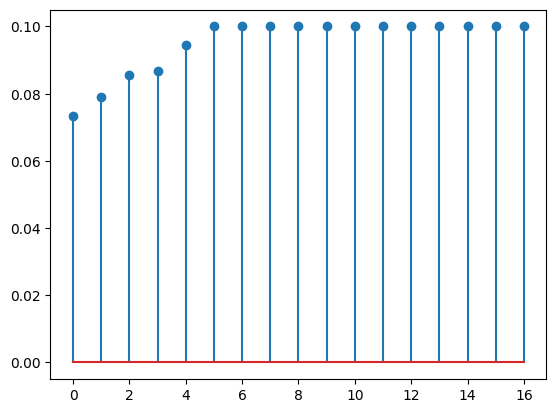

<Figure size 1000x2400 with 0 Axes>

[0.07345438659532803, 0.07897154960623226, 0.08546542901844291, 0.08675993835373468, 0.09447217989450539, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 1s 677ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 418ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


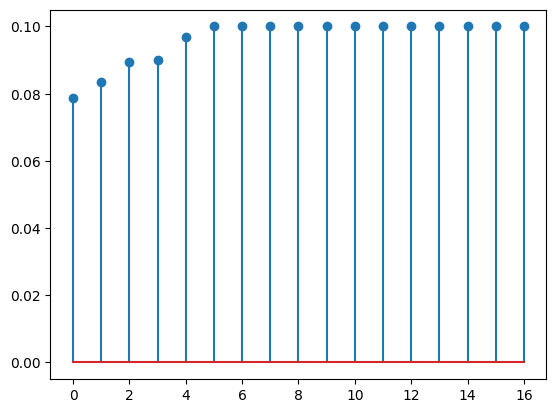

<Figure size 1000x2400 with 0 Axes>

[0.07877392517736857, 0.08357041485825305, 0.08933353914212519, 0.0901163837820999, 0.09697442983277171, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 426ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 439ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


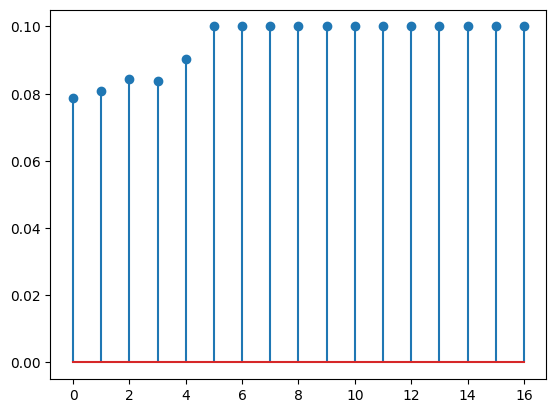

<Figure size 1000x2400 with 0 Axes>

[0.07860095832479572, 0.08070814462542983, 0.08428818337421444, 0.08364842723639387, 0.0901919922819373, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 431ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 429ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


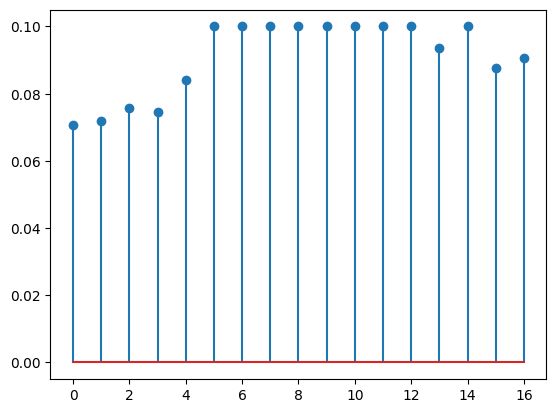

<Figure size 1000x2400 with 0 Axes>

[0.07056906607491834, 0.0718604132272616, 0.07586327555834861, 0.07442468701257782, 0.08407551563188595, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.09362267664633024, 0.1, 0.08757414007491497, 0.09068352501923027]
Loaded model from disk
128
1/1 [==============================] - 1s 636ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 1s 658ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


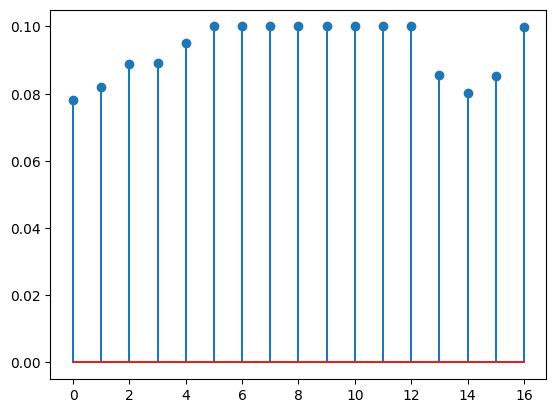

<Figure size 1000x2400 with 0 Axes>

[0.07825821816960757, 0.08201577922120086, 0.08869045541074222, 0.08912533195068305, 0.09522262983962719, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08542635353500762, 0.08006853410843928, 0.08519428431910246, 0.09987061858557933]
Loaded model from disk
128
1/1 [==============================] - 0s 431ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 430ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


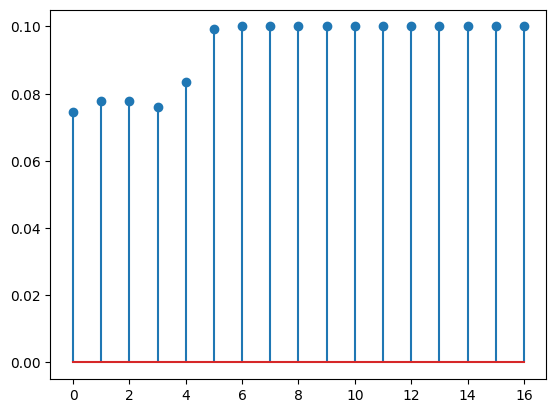

<Figure size 1000x2400 with 0 Axes>

[0.07451658499561926, 0.07782274029000649, 0.07788279533980937, 0.07602242988194799, 0.08360864438015038, 0.099121996450446, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 424ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 418ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


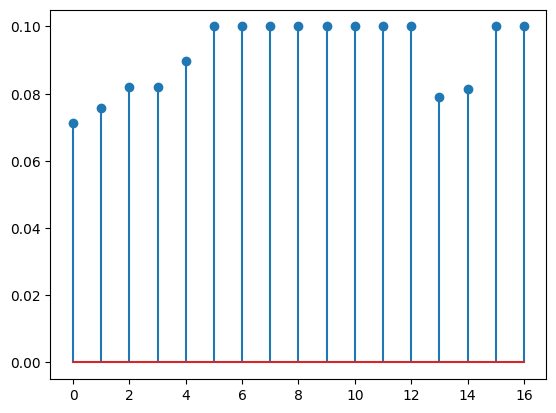

<Figure size 1000x2400 with 0 Axes>

[0.07115159821151223, 0.07575979765902388, 0.08195885969827452, 0.08193839712499039, 0.08984459135623413, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0791590591548674, 0.08140791899691073, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 1s 665ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 1s 809ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


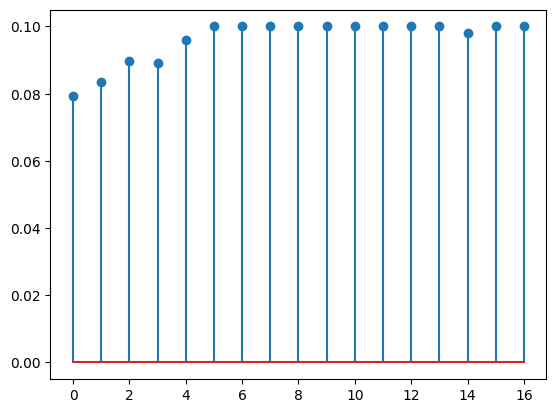

<Figure size 1000x2400 with 0 Axes>

[0.07934510893747326, 0.08346215320093146, 0.08965810356265395, 0.08920502518597145, 0.09601037394289198, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.09807038914035962, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 431ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 446ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


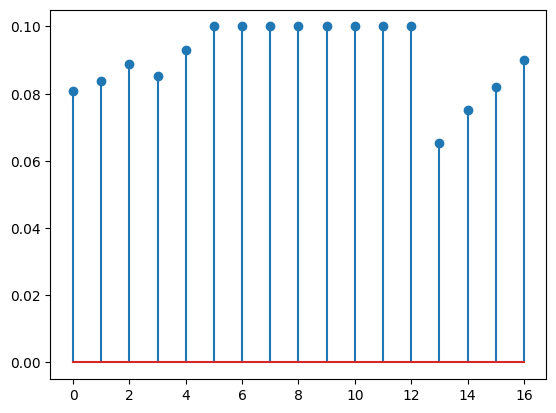

<Figure size 1000x2400 with 0 Axes>

[0.08080632951844435, 0.08390938179775687, 0.08877807969299656, 0.08524914643039147, 0.09290033089723967, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.06522820955142078, 0.075266390448178, 0.0819281195038239, 0.08997993956179218]
Loaded model from disk
128
1/1 [==============================] - 0s 443ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 433ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


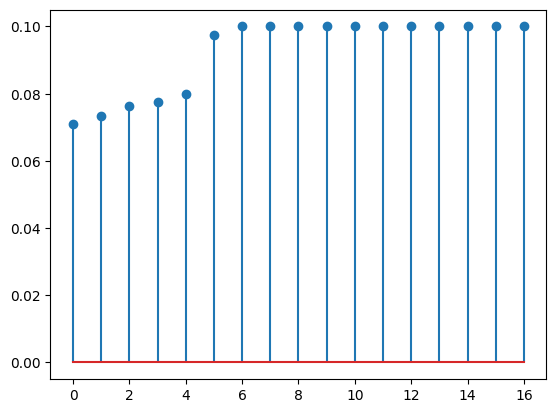

<Figure size 1000x2400 with 0 Axes>

[0.07082762642398951, 0.07339951504706896, 0.07644869588366503, 0.07762225577708111, 0.0800210202961147, 0.09745682319584258, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 1s 624ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 482ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


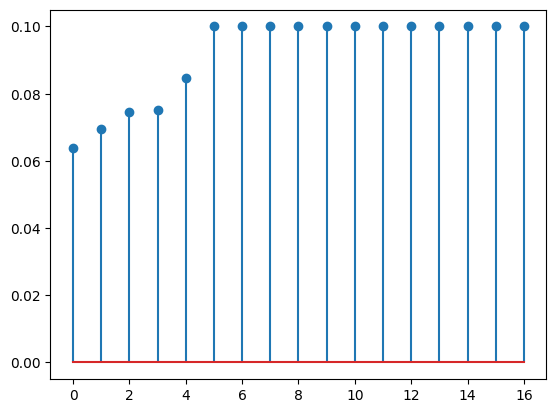

<Figure size 1000x2400 with 0 Axes>

[0.06375210058223857, 0.06953380079184501, 0.07469180226390307, 0.07504617262680942, 0.08477634493958741, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 429ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 438ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


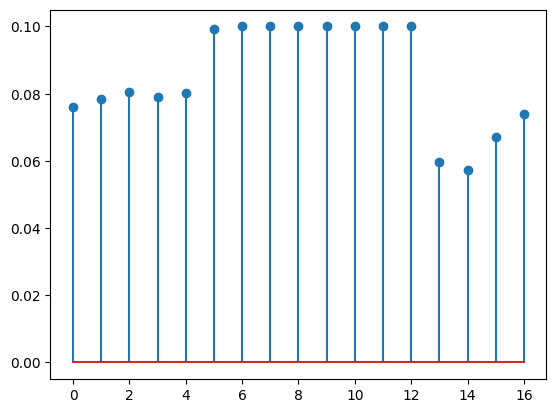

<Figure size 1000x2400 with 0 Axes>

[0.07612971879219431, 0.0784392514547181, 0.08060687521183559, 0.07890901928230176, 0.08025241698635437, 0.09922554787692378, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05966660746191852, 0.057263823574022314, 0.067172365476008, 0.07403538085323282]
Loaded model from disk
128
1/1 [==============================] - 0s 421ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 413ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


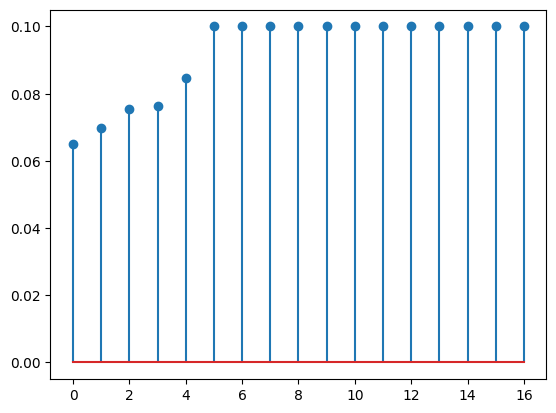

<Figure size 1000x2400 with 0 Axes>

[0.06489430680651025, 0.06975151258791731, 0.0754279056160615, 0.07633648717078759, 0.08467319530378718, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 1s 669ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 1s 677ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


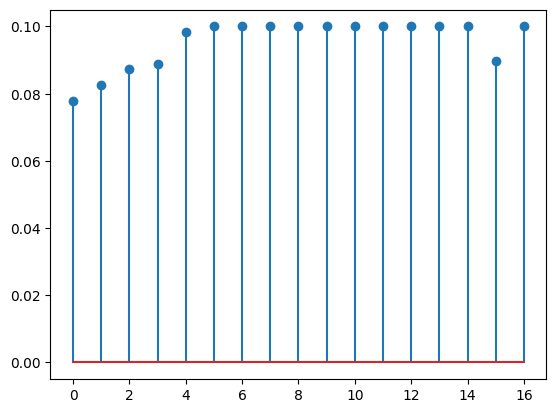

<Figure size 1000x2400 with 0 Axes>

[0.07795910159586417, 0.08255848072792654, 0.08741652489560117, 0.08871041134784326, 0.09826960228655943, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08979810945764778, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 416ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 425ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


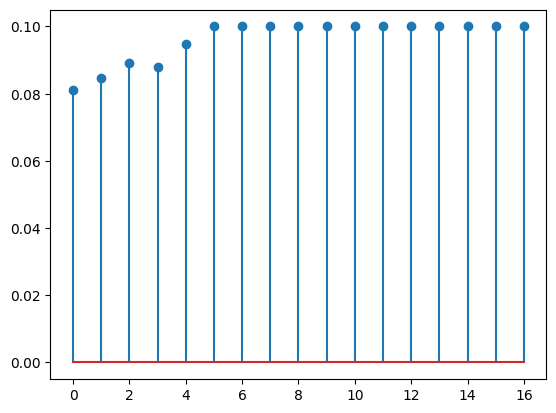

<Figure size 1000x2400 with 0 Axes>

[0.08113328284939281, 0.08458951609892622, 0.0889828909561273, 0.08807492306600073, 0.09487872972203812, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 411ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 407ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


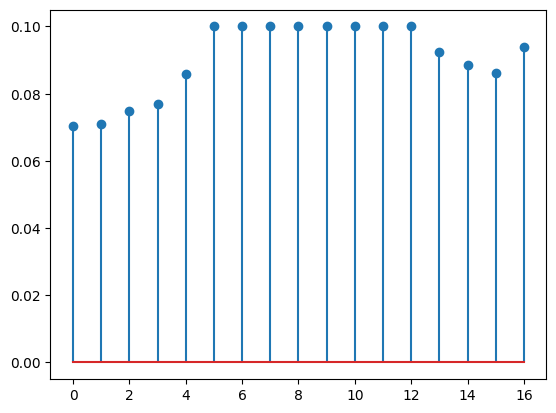

<Figure size 1000x2400 with 0 Axes>

[0.07031635421253372, 0.07109695329143999, 0.0749336120632918, 0.0767894533993382, 0.08599995601230542, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0923451742980675, 0.08862994281500071, 0.08609297954435204, 0.09386398223149993]
Loaded model from disk
128
1/1 [==============================] - 1s 593ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 1s 681ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


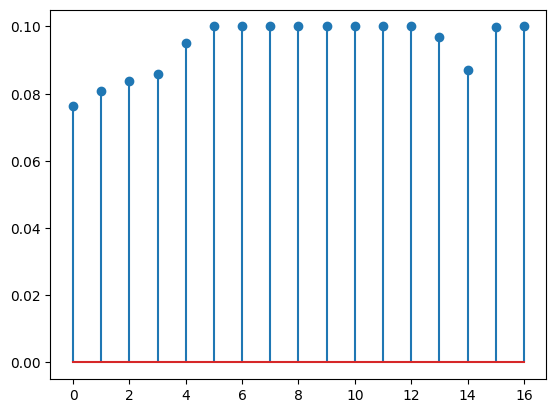

<Figure size 1000x2400 with 0 Axes>

[0.07644087416880273, 0.08072510741982127, 0.08368265903829732, 0.08593517228192686, 0.09515305670869777, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.09689520417427827, 0.08699763603823432, 0.09976131750562052, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 418ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 422ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


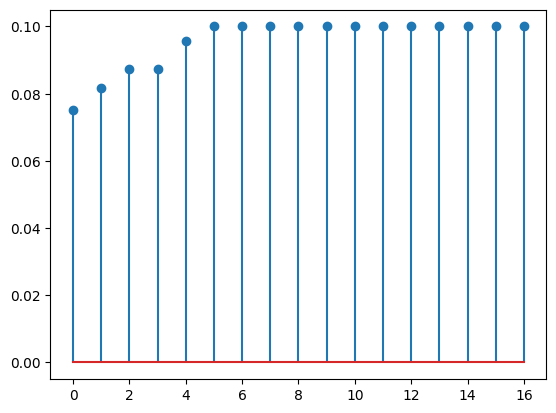

<Figure size 1000x2400 with 0 Axes>

[0.075270955750885, 0.08181037491630103, 0.08730758086698315, 0.08735050827542297, 0.09570745808980408, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 414ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 418ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


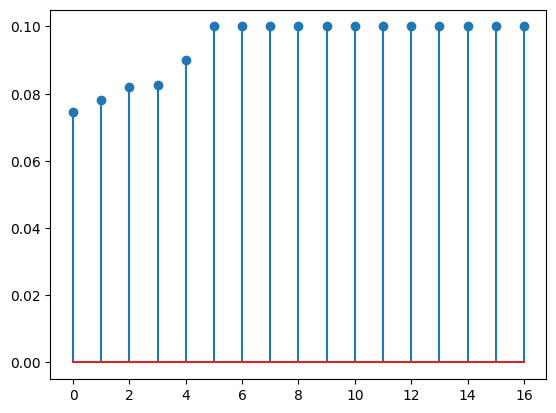

<Figure size 1000x2400 with 0 Axes>

[0.07460497248229785, 0.07824669277407366, 0.08213622471895574, 0.08265672254026403, 0.08995054523436619, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 430ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 1s 717ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


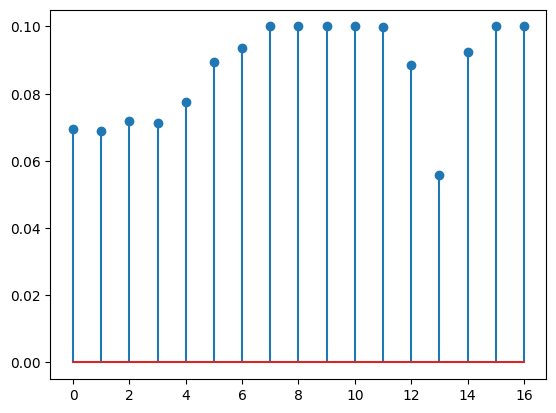

<Figure size 1000x2400 with 0 Axes>

[0.06948051462014924, 0.06876682103034013, 0.07189444206065718, 0.07127591463530013, 0.07737858528546712, 0.0895486492354414, 0.09369303040454682, 0.1, 0.1, 0.1, 0.1, 0.09986891317953328, 0.08850877126212871, 0.055830202157126085, 0.09242328908209657, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 428ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 414ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


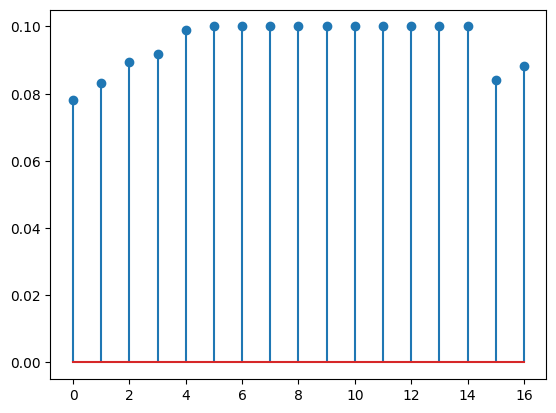

<Figure size 1000x2400 with 0 Axes>

[0.07814510291448729, 0.08325510017411913, 0.08949881633862367, 0.09191573426538974, 0.09896187433622593, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08409442505462789, 0.08814475277817925]
Loaded model from disk
128
1/1 [==============================] - 0s 452ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 421ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


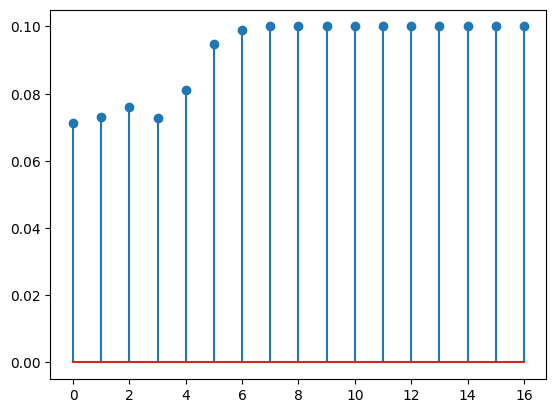

<Figure size 1000x2400 with 0 Axes>

[0.07138004919088768, 0.0731310112783139, 0.07598907920859613, 0.0727296519453181, 0.08097347659031376, 0.09492464621826356, 0.09888493672771496, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 438ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 1s 638ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


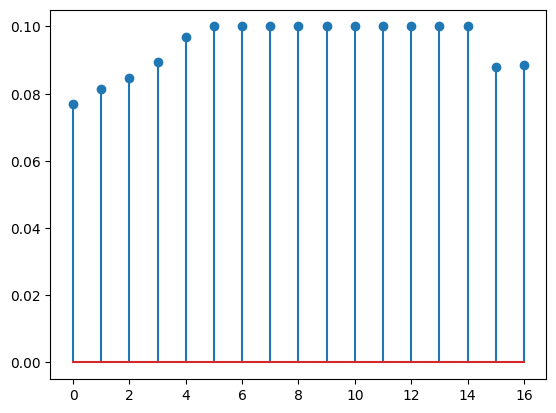

<Figure size 1000x2400 with 0 Axes>

[0.07687984703650232, 0.08148346694346971, 0.0847470247534357, 0.0894765060094809, 0.09697386031373587, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08782067054908543, 0.08846696226611225]
Loaded model from disk
128
1/1 [==============================] - 0s 437ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 445ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


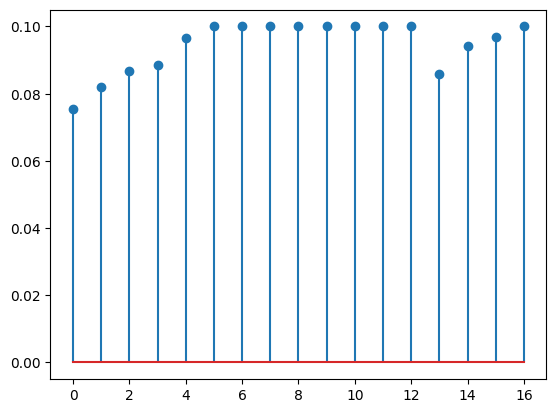

<Figure size 1000x2400 with 0 Axes>

[0.07553379472295012, 0.08197153627512843, 0.08676920950898492, 0.08854522132305229, 0.09663058649521418, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.08584576428139976, 0.09414806580348783, 0.09680695051454824, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 439ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 427ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


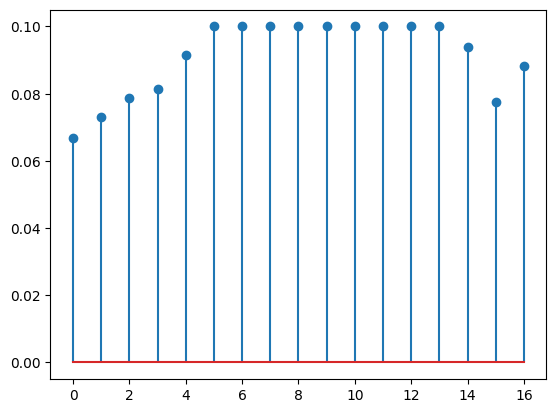

<Figure size 1000x2400 with 0 Axes>

[0.06677359172207496, 0.07295714116531833, 0.07867692982474896, 0.08134036373411035, 0.09153984591463483, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.09375991972984084, 0.07754890195601748, 0.08830126463475184]
Loaded model from disk
128
1/1 [==============================] - 0s 408ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 1s 622ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


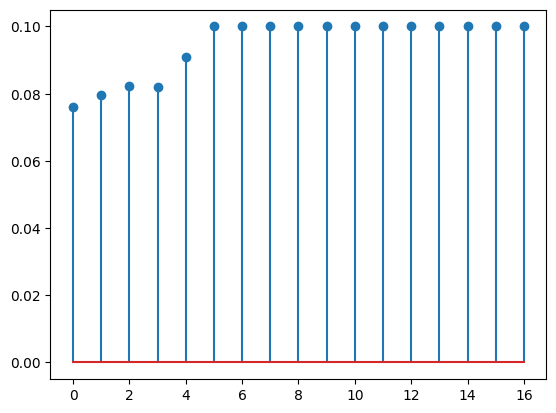

<Figure size 1000x2400 with 0 Axes>

[0.07609930295457136, 0.07962131548450528, 0.0823880516796881, 0.0821189389852852, 0.09087271797104998, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 466ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 425ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


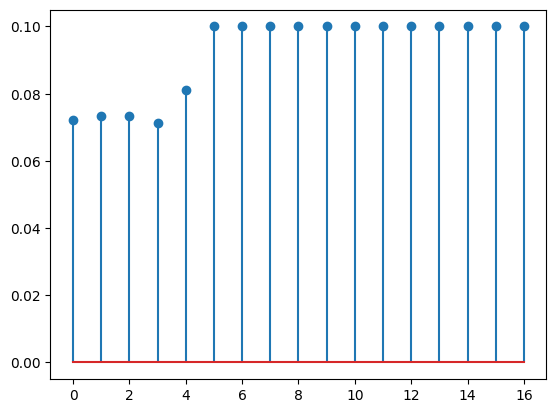

<Figure size 1000x2400 with 0 Axes>

[0.07217891151929333, 0.07332018831290987, 0.0732234960726373, 0.07142195529195051, 0.08124289103116555, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 403ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 425ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


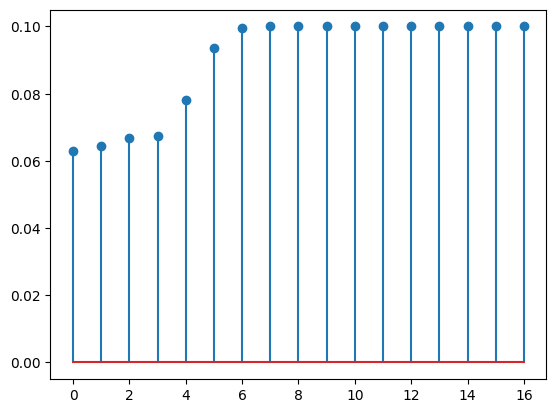

<Figure size 1000x2400 with 0 Axes>

[0.06298465603561858, 0.06433977704663289, 0.06678443297133956, 0.06731544272960564, 0.07803110228028562, 0.09358844284321782, 0.09950655424576516, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 0s 418ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 421ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


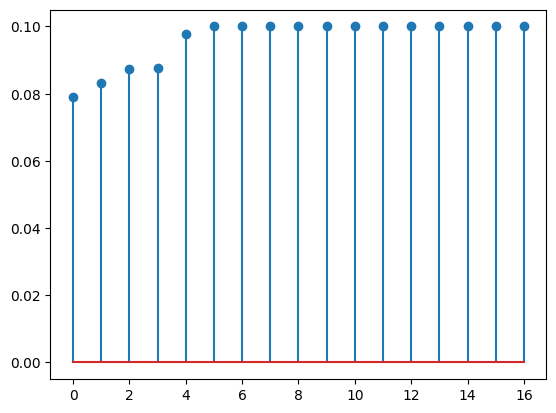

<Figure size 1000x2400 with 0 Axes>

[0.07904466432845826, 0.08308045243165822, 0.08737347096743547, 0.08765241650262684, 0.09766536546810249, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
Loaded model from disk
128
1/1 [==============================] - 1s 689ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
Loaded model from disk
128
1/1 [==============================] - 0s 414ms/step
(3, 128, 128)
(3, 128, 128)
8064
63
type g1: <class 'numpy.ndarray'>


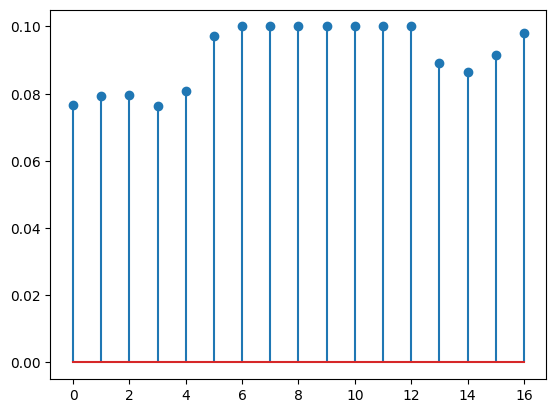

<Figure size 1000x2400 with 0 Axes>

[0.07674054740934905, 0.07941777118677978, 0.0796985732776517, 0.0762467721081243, 0.08081023973330172, 0.09709192052122047, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0890385865372421, 0.08660029387963433, 0.09162446673170682, 0.09805127589579599]


In [99]:
automate_multifiles('/content/wav_files_toprocess',alpha=0.1)

In [100]:
packagewav()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
shutil.rmtree('/content/files_to_download')  # Delete the directory
os.remove('/content/files_to_download.zip')  # Delete the zip file

In [ ]:
cutoff_frequency = 4000  # Cutoff frequency in Hz

i=-15
j=9
alpha=100
gain1=0
gain2=0
gain3=0
gain4=0

automate_noise_dict = {}
ratio_list=[]
energy_list=[]
bottom_energy_list=[]
db_list=[]
window_energy_list=[]
ratio_top_bottom_list=[]
window_length = 16000 #1 second
hop_length = 2000 #1/8 second

file_name = "04-long_-16db_1_cut4ms____"

mixed_audio = AudioSegment.from_file(f"{file_name[:-4]}_mixed_{i}db_{j}.wav")
y , sr = librosa.load(f"{file_name[:-4]}_mixed_{i}db_{j}.wav", sr=8000) #load the original mixed audio @ 8000Hz

# Assuming you already loaded the audio and assigned it to y and sr as you mentioned
write(f"{file_name[:-4]}_mixed_8k_{i}db_{j}.wav", sr, y)



original_audio_np = audiosegment_to_numpy(mixed_audio)
filtered_data = highpass_filter(original_audio_np, cutoff_frequency, 16000)
filtered_audio = numpy_to_audiosegment(filtered_data, 16000)
HPGproc = filtered_audio + gain3
HPGproc.export(f"{file_name[:-4]}_HPGproc_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])

# full band gain
FBGproc = mixed_audio + gain4
FBGproc.export(f"{file_name[:-4]}_FBGproc_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])

#low band neural net processing
prediction('/content', '/content', '/content/', [f'{file_name[:-4]}_mixed_8k_{i}db_{j}.wav'], f'{file_name[:-4]}_proc_{i}db_{j}.wav')
LBNproc = AudioSegment.from_file(f"{file_name[:-4]}_proc_{i}db_{j}.wav")
LBNproc = LBNproc+gain2
LBNproc.export(f"{file_name[:-4]}_LBNproc_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])


#High band neural net proc
original_audio_np = audiosegment_to_numpy(mixed_audio)
n = np.arange(len(original_audio_np))
y = original_audio_np * (-1)**n
inversed_audio = numpy_to_audiosegment(y,16000)
inversed_audio.export(f"{file_name[:-4]}_mixed_16k_inversed.wav",format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])
y,sr = librosa.load(f"{file_name[:-4]}_mixed_16k_inversed.wav",sr=8000)
write(f'{file_name[:-4]}_mixed_8k_inversed_{i}db_{j}.wav', sr, y)
prediction('/content', '/content', '/content/', [f'{file_name[:-4]}_mixed_8k_inversed_{i}db_{j}.wav'], f'{file_name[:-4]}_proc_inversed_{i}db_{j}.wav')
proc_inversed_audio=AudioSegment.from_file(f'{file_name[:-4]}_proc_inversed_{i}db_{j}.wav')
y,sr = librosa.load(f'{file_name[:-4]}_proc_inversed_{i}db_{j}.wav',sr=16000)
write(f'{file_name[:-4]}_proc_16k_inversed_{i}db_{j}.wav', sr, y)
proc_inversed_audio=AudioSegment.from_file(f'{file_name[:-4]}_proc_16k_inversed_{i}db_{j}.wav')
proc_inversed_audio_np = audiosegment_to_numpy(proc_inversed_audio)
m = np.arange(len(proc_inversed_audio_np))
z = proc_inversed_audio_np*(-1)**m
HBNproc = numpy_to_audiosegment(z,16000)
HBNproc = HBNproc + gain1
HBNproc.export(f"{file_name[:-4]}_HBNproc_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])


final_HBNLBN = HBNproc.overlay(LBNproc)
final_HBNLBN.export(f"{file_name[:-4]}_combined_HBN&LBN_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])
min_length = len(final_HBNLBN)
trimmed_audio = mixed_audio[:min_length]
final_HPG = final_HBNLBN.overlay(HPGproc)
final_HPG.export(f"{file_name[:-4]}_combined_HPG_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])
trimmed_audio.export(f"{file_name[:-4]}_mixed_{i}db_{j}.wav", format="wav", parameters=["-ar", "16000"])


combined_energy1, _ =calculate_energy(f"{file_name[:-4]}_combined_HBN&LBN_{i}db_{j}.wav")
mixed_energy1, _ = calculate_energy(f"{file_name[:-4]}_mixed_{i}db_{j}.wav")
G1 = [1 if math.sqrt(combined_energy1/(mixed_energy1+1e-10))>1 else math.sqrt(combined_energy1/(mixed_energy1+1e-10))]
# print(G1)
G1 = np.array(G1)
trimmed_audio_np1 = audiosegment_to_numpy(trimmed_audio)
print(f"type g1: {type(G1)}")
trimmed_audio_np1 = trimmed_audio_np1*(alpha*G1)
final_HBNLBN_np1 = audiosegment_to_numpy(final_HBNLBN)
final_audio_np1 = final_HBNLBN_np1+trimmed_audio_np1
max_value1 = np.max(np.abs(final_audio_np1))
final_audio_np1 = final_audio_np1 / max_value1
final_audio1 = numpy_to_audiosegment(final_audio_np1, 16000)
final_audio1.export(f"{file_name[:-4]}_obadded_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])


combined_energy, _ =calculate_energy_per_window(f"{file_name[:-4]}_combined_HBN&LBN_{i}db_{j}.wav")
mixed_energy, _ = calculate_energy_per_window(f"{file_name[:-4]}_mixed_{i}db_{j}.wav")
#G = [1/alpha if math.sqrt(a / (b+1e-10))>=1/alpha else math.sqrt(a/(b+1e-10)) for a, b in zip(combined_energy, mixed_energy)]
Q = [alpha if alpha*math.sqrt(a / (b+1e-10))>= alpha else alpha*math.sqrt(a/(b+1e-10)) for a, b in zip(combined_energy, mixed_energy)]
# Q = [
#   alpha if math.sqrt(a / (b + 1e-10)) >= 1
#   else alpha * math.sqrt(a / (b + 1e-10)) if math.sqrt(a / (b + 1e-10)) >= 0.8
#   else 0.8 * alpha
#   for a, b in zip(combined_energy, mixed_energy)
# ]

#######ploting#####
y = np.array(Q)
x = np.arange(len(y))

plt.stem(x,y)
plt.figure(figsize=(10,24))
plt.show()#ploting Q
print(Q)

trimmed_audio_np = audiosegment_to_numpy(trimmed_audio)
adjusted_audio_np = np.zeros_like(trimmed_audio_np)
for idx, q in enumerate(Q):
  start = int(idx * hop_length) #hop_length
  end = start + window_length #window_length
  if end > len(trimmed_audio_np):
      end = len(trimmed_audio_np)
  adjusted_audio_np[start:end] += trimmed_audio_np[start:end] * 0.125*q#this is Q*y[n]
# print(f"length of trimmed audio is {len(trimmed_audio_np)/16000}")

final_HBNLBN_np = audiosegment_to_numpy(final_HBNLBN)
final_audio_np = final_HBNLBN_np+adjusted_audio_np#this is x[n] + Q*y[n]
max_value = np.max(np.abs(final_audio_np))
final_audio_np = final_audio_np / max_value#normalization
final_audio = numpy_to_audiosegment(final_audio_np, 16000)


# trimmed_audio = numpy_to_audiosegment(adjusted_audio_np, 16000)
# final_audio = trimmed_audio.overlay(final_HBNLBN)
# final_audio = final_audio + one_sec
final_audio.export(f"{file_name[:-4]}_adaptive_{i}db_{j}.wav", format="wav",parameters=["-ar", "16000","-sample_fmt", "s16"])

os.remove(f'{file_name[:-4]}_proc_16k_inversed_{i}db_{j}.wav')
os.remove(f'{file_name[:-4]}_proc_inversed_{i}db_{j}.wav')
os.remove(f'{file_name[:-4]}_mixed_8k_inversed_{i}db_{j}.wav')
os.remove(f'{file_name[:-4]}_mixed_16k_inversed.wav')
os.remove(f'{file_name[:-4]}_proc_{i}db_{j}.wav')
os.remove(f'{file_name[:-4]}_HBNproc_{i}db_{j}.wav')
os.remove(f'{file_name[:-4]}_HPGproc_{i}db_{j}.wav')
os.remove(f'{file_name[:-4]}_mixed_8k_{i}db_{j}.wav')
os.remove(f"{file_name[:-4]}_FBGproc_{i}db_{j}.wav")
os.remove(f"{file_name[:-4]}_LBNproc_{i}db_{j}.wav")
os.remove(f"{file_name[:-4]}_combined_HBN&LBN_{i}db_{j}.wav")
os.remove(f"{file_name[:-4]}_combined_HPG_{i}db_{j}.wav")

In [ ]:
print(G1*alpha)
y = np.array(G_new)
print(y)
x = np.arange(len(y))
# print(y)
# print(len(y))
plt.bar(x,y)
plt.show()

________________________________________________
### Conclusion

*   A deep learing audio denoiser is presented in the given project which denoises envionmental noises.
*   By using a magnitude spectrogram representation of sound, the audio denoising problem has been transformed into an image processing problem, simplifying its resolution.

*   The Noise to remove has been modelled by a U-Net and Resnet 101 encoder, out of which the Unet model performed better.

*  The predictions are satisfactory and upon increasing audio amplitude the voice become more clear.

________________________________________________

# Deployment

- The Model has been deployed in **streamlit**.
- Streamlit is an open source app framework in Python language.
- It helps us create web apps for data science and machine learning in a short time.[Click to know more](https://docs.streamlit.io/)

- App link: [here](https://aravindsriraj-audio-denoising-app-4yzf1z.streamlit.app/)

- Demo: https://drive.google.com/file/d/1hIOLWJ99UMjMrlMdj-fV_ihbv5kFhE99/view?usp=share_link


______________________________________________________________

# Future Scope

*   By training a machine learning model on a large dataset of noisy and clean audio signals, it may be possible to create denoising algorithms that are more effective at removing specific types of noise.
*    Another area for development is the integration of audio denoising tools into other systems and applications, such as audio recording and editing software or voice recognition systems.
*   Overall, there is a lot of potential for further development in this field, and continued research and development is likely to result in more advanced and effective denoising algorithms that can be used in a variety of applications.


_____________________________________________________________
# References

- https://arxiv.org/pdf/1703.08019.pdf
- https://arxiv.org/pdf/1811.11307.pdf
- https://github.com/qubvel/segmentation_models
- https://segmentation-models.readthedocs.io/en/latest/tutorial.html